# Lab 2 - Mateusz Markiewicz (298653)

## Ex 1
Generate orthonormal $(X^T X = I)$ matrix od dimension $1000 \times 950$. Consider the regressionmodel
$Y = X \beta + \epsilon$,
with $\epsilon \sim N(0, I_{N\times N})$ and the vector of regression coefficients $\beta_1 = \cdots = \beta_k = 3.5$ and $\beta_{k+1} = \cdots = \beta_{950} = 0$ with $k = \{20,100,200\}$.

For each of these cases:

i) To be done by hand: Calculate the value of the tuning parameter $\lambda$ for the ridge regression, so as to minimize the mean square error of the estimation of $\beta$.

ii) To be done by hand: Calculate the bias, the variance and the mean squared error of this optimal estimator.

iii) To be done by hand: Find the critical value and calculate the power of the statistical test based on the ridge estimator and controlling FWER at the level 0.1.

iv) Generate 200 replicates of the above model and analyze the data using ridge regression and OLS. Compare empirical bias, variance, mse and the power of the test based on the ridge estimator with the theoretical values of these parameters, calculated above and with the corresponding parameters of OLS.

### Optimal $\gamma$

We want to find $\gamma$ minimizing the expected value of the mean square error of estimation of $\beta$. To do so, we can simply compute the derivative and find the root of it. Of course, $\gamma$ has different values for each k.

![](1.png)

In [1]:
p <- 950;
k <- c(20,100,200);
gamma <- p/(k*(3.5)^2);
gamma

[1] 3.8775510 0.7755102 0.3877551

### Bias, variance and the MSE

Bias is the difference between the true value of $\beta_i$ and an estimation. We can see that bias has different values for $\beta_i = 0$ and $\beta_i \neq 0$.

![](2.png)

In [2]:
print("Bias for nonzero betas:")
bias <- -gamma/(1+gamma)*3.5
print(bias)
print("Bias for zero betas:")
bias2 <- rep(0,3)
print(bias2)

[1] "Bias for nonzero betas:"
[1] -2.7824268 -1.5287356 -0.9779412
[1] "Bias for zero betas:"
[1] 0 0 0


We can get a variance of RR-beta estimation by scaling the variance of OLS-beta estimation.

![](3.png)

In [3]:
var = (1/(1+gamma))^2
var

[1] 0.04203358 0.31721496 0.51924740

We can calculate MSE using our bias and variance values.

![](4.png)

In [4]:
MSE <- (p+k*((3.5*gamma)^2))/((1+gamma)^2)
MSE

[1] 194.7699 535.0575 684.5588

### Critival value and power

To calculate the power we have to calculate critical value firstly, for example using Bonferroni correction.

![](5.png)

In [5]:
t <- qnorm(1-0.1/(2*p))
c <- 1/(1+gamma)
tcrit <- t*c
tcrit

[1] 0.7950975 2.1842332 2.7945337

The power is the same for all $\gamma$ values.

![](6.png)

In [6]:
power <- 1 - pnorm(t-3.5) + pnorm(-t-3.5)
power

[1] 0.3526676

In [7]:
X <- matrix(rep(0,1000*950),1000,950);
diag(X) <- 1;

In [8]:
betas1 <- rep(0,950)
betas1[1:k[1]] <- 3.5
betas2 <- rep(0,950)
betas2[1:k[2]] <- 3.5
betas3 <- rep(0,950)
betas3[1:k[3]] <- 3.5
betas <- array(c(betas1,betas2,betas3),dim=c(950,3))

In [9]:
Xb1 <- X%*%betas[,1]
Xb2 <- X%*%betas[,2]
Xb3 <- X%*%betas[,3]
Xb <- array(c(Xb1,Xb2,Xb3),dim=c(1000,3))

In [2]:
library(glmnet);

Loading required package: Matrix

Loaded glmnet 4.1-1



In [313]:
reps <- 200;
betas_rr <- array(rep(0, 3*reps*p), c(3, reps, p)); 
betas_ols <- array(rep(0, 3*reps*p), c(3, reps, p)); 

In [314]:
XtX <- t(X) %*% X;
for (i in 1:reps){
    epsilon <- rnorm(1000);
    for (j in 1:3){
        Y <- Xb[,j] + epsilon;
        betas_rr[j,i,] <- solve(XtX + gamma[j]*diag(p)) %*% t(X) %*% Y;
        
        obj2<-lm(Y~X-1);
        betaols<-obj2$coefficients;
        betas_ols[j,i,]<-betaols;
    }
}

In [315]:
var_ridge <- apply(apply(betas_rr,c(1,3),var),c(1),mean)
bias_ridge <- c(mean(t(t(betas_rr[1,,1:k[1]]) - rep(3.5, k[1]))), mean(t(t(betas_rr[2,,1:k[2]]) - rep(3.5, k[2]))), mean(t(t(betas_rr[3,,1:k[3]]) - rep(3.5, k[3]))));
bias_ridge0 <- c(mean(betas_rr[1,,(k[1]+1):p]), mean(betas_rr[2,,(k[2]+1):p] ), mean(betas_rr[3,,(k[3]+1):p]));
mse_ridge <- c(mean(apply(t(t(betas_rr[1,,]) - betas[,1])^2,1,sum)), mean(apply(t(t(betas_rr[2,,]) - betas[,2])^2,1,sum)), mean(apply(t(t(betas_rr[3,,]) - betas[,3])^2,1,sum)));
power_ridge <- c(mean(apply(betas_rr[1,,1:k[1]] > tcrit[1],1,mean)), mean(apply(betas_rr[2,,1:k[2]] > tcrit[2],1,mean)), mean(apply(betas_rr[3,,1:k[3]] > tcrit[3],1,mean)));

var_ols <- apply(apply(betas_ols,c(1,3),var),c(1),mean)
bias_ols <- c(mean(t(t(betas_ols[1,,1:k[1]]) - rep(3.5, k[1]))), mean(t(t(betas_ols[2,,1:k[2]]) - rep(3.5, k[2]))), mean(t(t(betas_ols[3,,1:k[3]]) - rep(3.5, k[3]))));
bias_ols0 <- c(mean(betas_ols[1,,(k[1]+1):p]), mean(betas_ols[2,,(k[2]+1):p] ), mean(betas_ols[3,,(k[3]+1):p]));
mse_ols <- c(mean(apply(t(t(betas_ols[1,,]) - betas[,1])^2,1,sum)), mean(apply(t(t(betas_ols[2,,]) - betas[,2])^2,1,sum)), mean(apply(t(t(betas_ols[3,,]) - betas[,3])^2,1,sum)));
power_ols <- c(mean(apply(betas_ols[1,,1:k[1]] > t,1,mean)), mean(apply(betas_ols[2,,1:k[2]] > t,1,mean)), mean(apply(betas_ols[3,,1:k[3]] > t,1,mean)));

In [316]:
df_bias <- data.frame(
    Bias_Theo = bias,
    Bias_RR = bias_ridge,
    Bias_OLS = bias_ols
);
rownames(df_bias)<-k;
print(df_bias)

     Bias_Theo    Bias_RR     Bias_OLS
20  -2.7824268 -2.7828347 -0.001989650
100 -1.5287356 -1.5255339  0.005684651
200 -0.9779412 -0.9768305  0.001541392


In [317]:
df_bias0 <- data.frame(
    Bias0_Theo = rep(0,3),
    Bias0_RR = bias_ridge0,
    Bias0_OLS = bias_ols0
);
rownames(df_bias0)<-k;
print(df_bias0)

    Bias0_Theo     Bias0_RR    Bias0_OLS
20           0 -0.000220981 -0.001077846
100          0 -0.001067236 -0.001894888
200          0 -0.001297509 -0.001800624


In [318]:
df_var <- data.frame(
    Var_Theo = var,
    Var_RR = var_ridge,
    Var_OLS = var_ols
);
rownames(df_var)<-k;
print(df_var)

      Var_Theo    Var_RR   Var_OLS
20  0.04203358 0.0418949 0.9967008
100 0.31721496 0.3161684 0.9967008
200 0.51924740 0.5175343 0.9967008


In [319]:
df_mse <- data.frame(
    MSE_Theo = MSE,
    MSE_RR = mse_ridge,
    MSE_OLS = mse_ols
);
rownames(df_mse)<-k;
print(df_mse)

    MSE_Theo   MSE_RR  MSE_OLS
20  194.7699 194.6776 946.7254
100 535.0575 533.0398 946.7254
200 684.5588 682.4240 946.7254


In [320]:
df_power <- data.frame(
    Power_Theo = rep(power, 3),
    Power_RR = power_ridge,
    Power_OLS = power_ols
);
rownames(df_power)<-k;
print(df_power)

    Power_Theo Power_RR Power_OLS
20   0.3526676 0.362500  0.362500
100  0.3526676 0.360050  0.360050
200  0.3526676 0.356825  0.356825


I ran 200 iterations of the described model. Then I calculated bias, variance, MSE, and power of both ridge and OLS regressions. For each of those parameters, my theoretical calculations are really close to the ones that I get from the experiment. 

OLS regression has bias equal to 0 and variance equal to 1, what was expected. In the case of ridge regression, for k=20 we have a high absolute value of bias, but low variance, and for k=200 our abs(bias) gets lower, but variance has increased.

MSE for OLS regression is constant with respect to k. This is because in each iteration I'm using the same epsilon for k=20, k=100, and k=200. This MSE is also very high, MSE for RR is much smaller, especially when k is small.

The power is the same for all of those cases, as expected. 

## Ex 2
Generate the design matrix $X_{1000×950}$ such that its elements are iid random variables from $N(0,\sigma = \frac{1}{\sqrt{n}})$. Then generate the vector of the response variable according to the models
proposed in Task 1, above.

Estimate the parameters of this model using the ridge regression with the tuning parameter selected by

i) minimizing the SURE criterion

ii) 10 fold cross-validation

iii) OLS

iiii) OLS within the model selected by mBIC2.

Compare the estimation errors $||\hat{\beta}-\beta||^2$ and $||X(\hat{\beta}-\beta)||^2$ for these three approaches. Repeat the above experiment 100 times and compare the mean square errors of estimation of $\beta$ and $\mu = X\beta$ for the above approaches.

In [1]:
library('bigstep');
library(glmnet);

Loading required package: Matrix

Loaded glmnet 4.1-1



In [47]:
n <- 1000;
p <- 950;
k <- c(20,100,200);

In [91]:
X <- matrix(rnorm(n*p,0,1/sqrt(n)),n,p);

eig<-eigen(t(X)%*%X);
values<-eig$values;

In [92]:
signal <- 3.5
betas1 <- rep(0,p)
betas1[1:k[1]] <- signal
betas2 <- rep(0,p)
betas2[1:k[2]] <- signal
betas3 <- rep(0,p)
betas3[1:k[3]] <- signal
betas <- array(c(betas1,betas2,betas3),dim=c(p,3))

In [93]:
regression_comparison <- function(j, lambdaseq, X, betas, values, n, p, k){
    epsilon <- rnorm(n);
    Y <- X%*%betas[,j]+epsilon;

    obj<-glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
    betaRidgeSURE<-obj$beta;
    l=ncol(betaRidgeSURE);
    lambdas<-obj$lambda;
    sureridge<-rep(0,l);
    for (u in 1:l){
        trM<-sum(values/(values+lambdas[u]*n));
        sureridge[u]<-sum((X%*%betaRidgeSURE[,u]-Y)^2)+2*trM;
    }
    ind<-which(sureridge==min(sureridge));
    betaRidgeSURE <- betaRidgeSURE[,ind];
    mse_ridge_sure <- sum((betaRidgeSURE-betas[,j])^2);
    mse_mu_ridge_sure <- sum((X%*%(betaRidgeSURE-betas[,j]))^2);

    obj2<-cv.glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
    betaRidgeCv<-coefficients(obj2, s='lambda.min');
    betaRidgeCv<-betaRidgeCv[2:(p+1),1];
    mse_ridge_cv <- sum((betaRidgeCv-betas[,j])^2);
    mse_mu_ridge_cv <- sum((X%*%(betaRidgeCv-betas[,j]))^2);

    obj3<-lm(Y~X-1);
    betaols<-obj3$coefficients;
    mse_ols <- sum((betaols-betas[,j])^2);
    mse_mu_ols <- sum((X%*%(betaols-betas[,j]))^2);

    dat<-prepare_data(Y, X, verbose = FALSE);
    obj4<-stepwise(dat, crit='mbic2', maxf=p);
    selected<-as.numeric(obj4$model);
    betaolsmBIC<-rep(0,p);
    if (length(selected)>0){
        X_mBIC<-X[,selected];
        betaolsmBIC[selected] = summary(lm(Y ~ X_mBIC-1))$coef[,1];
    }
    mse_ols_mbic2 <- sum((betaolsmBIC-betas[,j])^2);
    mse_mu_ols_mbic2 <- sum((X%*%(betaolsmBIC-betas[,j]))^2);

    df <- data.frame(
        RR_SURE=c(mse_ridge_sure, mse_mu_ridge_sure),
        RR_CV=c(mse_ridge_cv, mse_mu_ridge_cv),
        OLS=c(mse_ols, mse_mu_ols),
        OLS_mBIC2=c(mse_ols_mbic2, mse_mu_ols_mbic2)
    )
    rownames(df)<-c('Beta MSE', 'Mu MSE')
    print(df)
    plot(obj2)
    plot(log(lambdas), sureridge);
    abline(v=log(lambdas[ind]), lwd=3, lty=2)
}

In [94]:
lseq1 <- seq(from=0.00005,by=0.00005, to=0.005);
lseq2 <- seq(from=0.000025,by=0.000025, to=0.0025);
lseq3 <- seq(from=0.00001,by=0.00001, to=0.001);

I'm using different lambdas sequences for each k. This helps me speed up the calculations. I'm comparing 4 different regressions: ridge regression with cross-validation, which minimizes MSE on the cross-validation (upper plots), ridge regression with SURE, which minimizes RSS + 2*Tr (lower plots), standard OLS regression, and OLS regression with mBIC2.

[1] "K:"
[1] 20
          RR_SURE    RR_CV        OLS OLS_mBIC2
Beta MSE 201.5136 200.8054 28294.9151  163.0312
Mu MSE   163.8824 162.7888   947.4593  137.1503


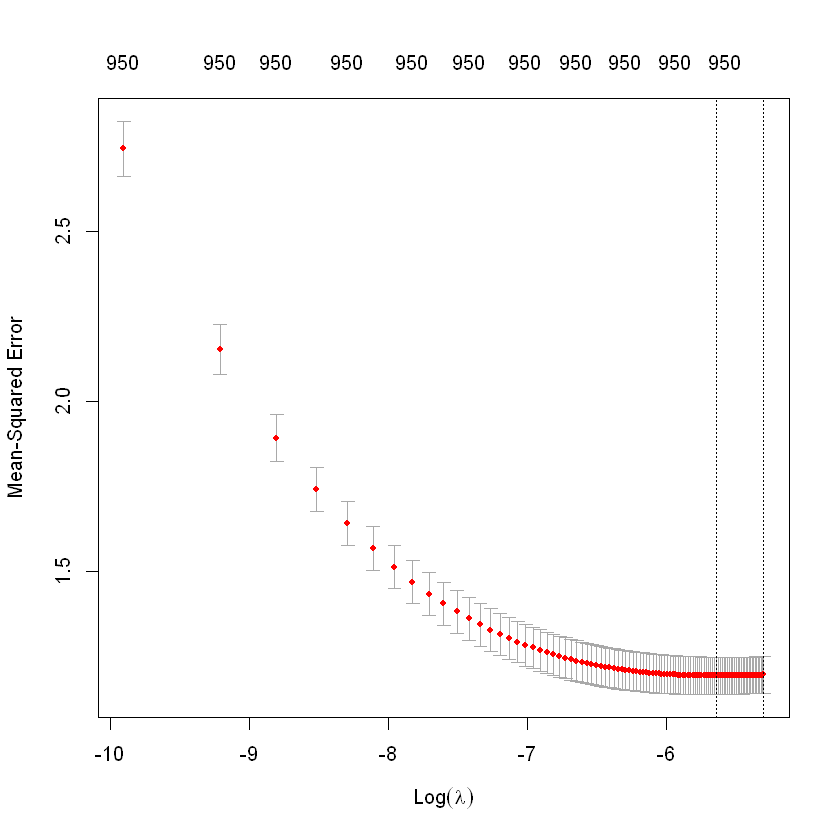

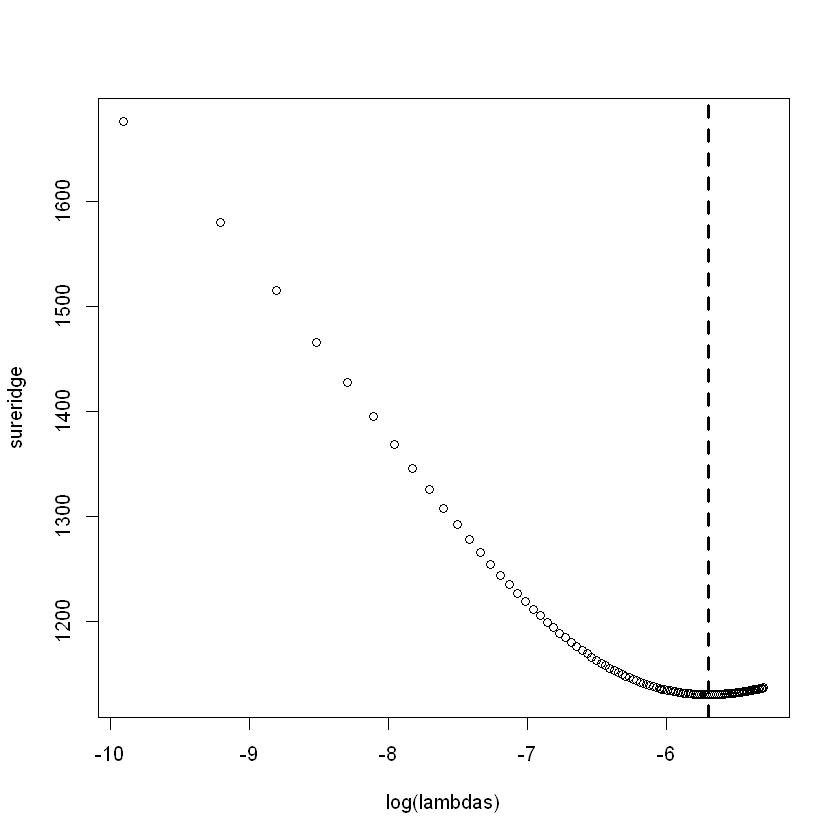

In [95]:
j<-1;
print('K:');
print(k[j]);
regression_comparison(j, lseq1, X, betas, values, n, p, k)

[1] "K:"
[1] 100
          RR_SURE    RR_CV        OLS OLS_mBIC2
Beta MSE 700.7033 701.3277 15487.6058  974.9707
Mu MSE   376.2064 375.8973   928.2755  712.3423


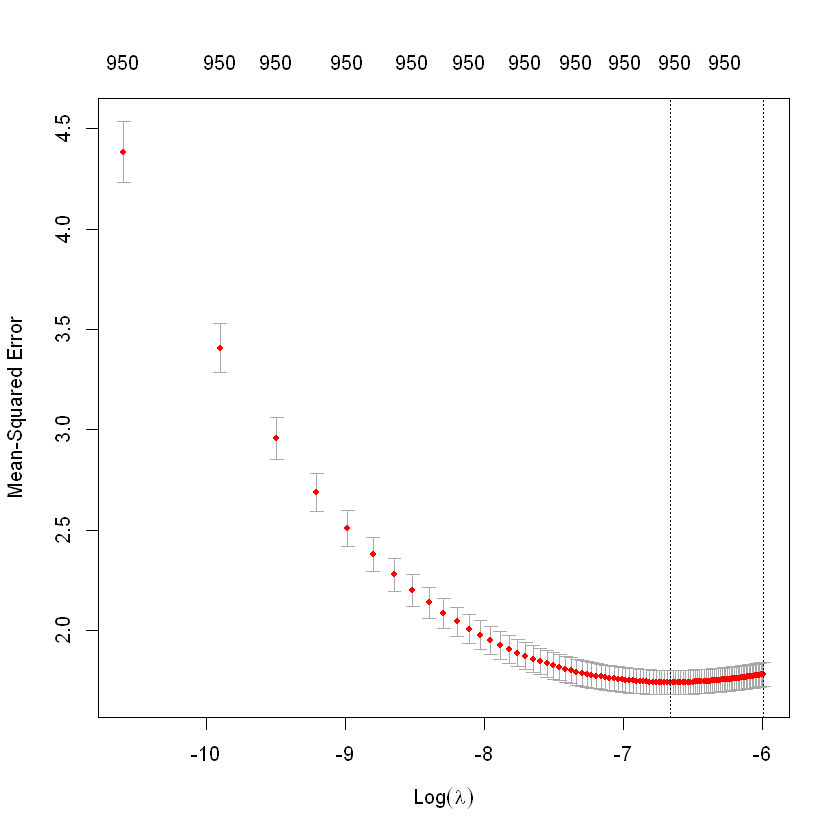

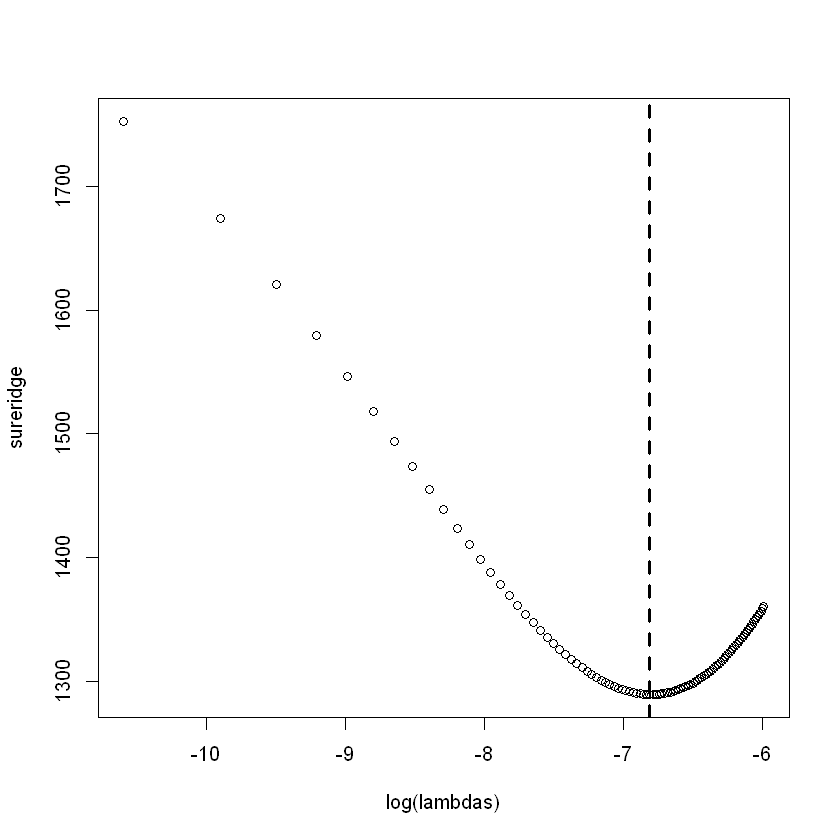

In [96]:
j<-2;
print('K:');
print(k[j]);
regression_comparison(j, lseq2, X, betas, values, n, p, k)

[1] "K:"
[1] 200
           RR_SURE     RR_CV      OLS OLS_mBIC2
Beta MSE 1115.2895 1118.4207 25491.98  2450.000
Mu MSE    549.1333  549.9566  1032.27  2326.744


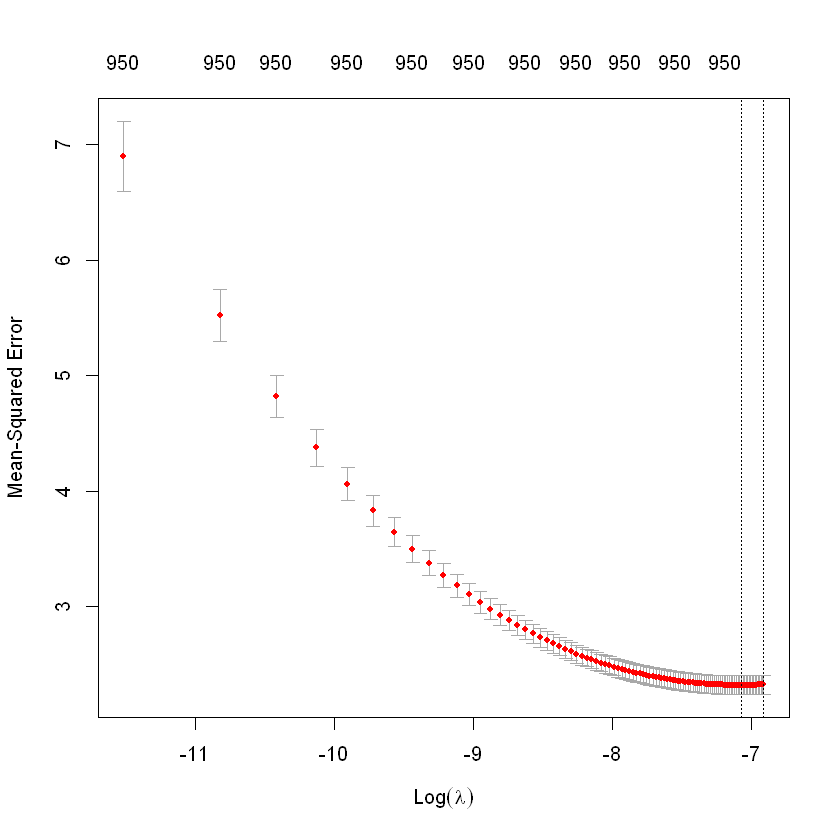

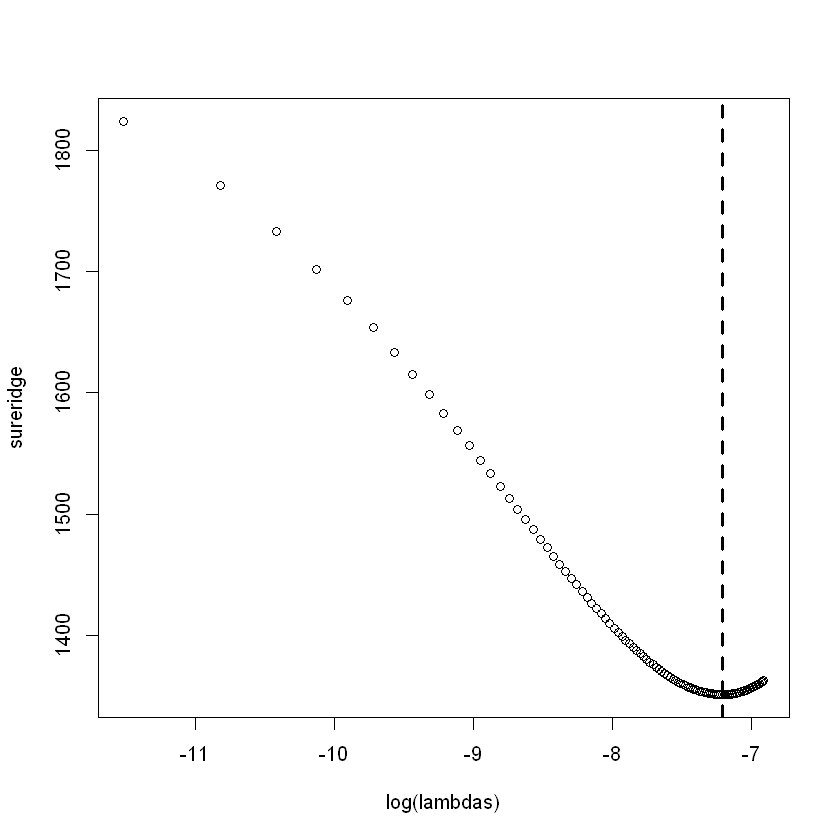

In [97]:
j<-3;
print('K:');
print(k[j]);
regression_comparison(j, lseq3, X, betas, values, n, p, k)

### 50 iterations

I'm performing only 50 iterations because they're too time-consuming.

In [10]:
reps <- 50;
mse_ridge_cv <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_cv <- array(rep(0, 3*reps), c(reps, 3));
mse_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3));

In [11]:
Xb1 <- X%*%betas[,1]
Xb2 <- X%*%betas[,2]
Xb3 <- X%*%betas[,3]
Xb <- array(c(Xb1,Xb2,Xb3),dim=c(n,3))

In [12]:
for (i in 1:reps){
    epsilon <- rnorm(1000);
    for (j in 1:3){
        Y <- Xb[,j] + epsilon;
        
        if (j==1){
            lambdaseq<-lseq1;
        } else if (j==2){
            lambdaseq<-lseq2;
        } else {
            lambdaseq<-lseq3;
        }

        obj<-glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeSURE<-obj$beta;
        l=ncol(betaRidgeSURE);
        lambdas<-obj$lambda;
        sureridge<-rep(0,l);
        for (u in 1:l){
            trM<-sum(values/(values+lambdas[u]*n));
            sureridge[u]<-sum((X%*%betaRidgeSURE[,u]-Y)^2)+2*trM;
        }
        ind<-which(sureridge==min(sureridge));
        betaRidgeSURE <- betaRidgeSURE[,ind];
        mse_ridge_sure[i,j] <- sum((betaRidgeSURE-betas[,j])^2);
        mse_mu_ridge_sure[i,j] <- sum((X%*%(betaRidgeSURE-betas[,j]))^2);
        
        obj2<-cv.glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeCv<-coefficients(obj2, s='lambda.min');
        betaRidgeCv<-betaRidgeCv[2:(p+1),1];
        mse_ridge_cv[i,j] <- sum((betaRidgeCv-betas[,j])^2);
        mse_mu_ridge_cv[i,j] <- sum((X%*%(betaRidgeCv-betas[,j]))^2);
        
        obj3<-lm(Y~X-1);
        betaols<-obj3$coefficients;
        mse_ols[i,j] <- sum((as.numeric(betaols)-betas[,j])^2);
        mse_mu_ols[i,j] <- sum((X%*%(as.numeric(betaols)-betas[,j]))^2);
        
        dat<-prepare_data(Y, X, verbose = FALSE);
        obj4<-stepwise(dat, crit='mbic2', maxf=p);
        selected<-as.numeric(obj4$model);
        betaolsmBIC<-rep(0,p);
        if (length(selected)>0){
            X_mBIC<-X[,selected];
            betaolsmBIC[selected] = summary(lm(Y ~ X_mBIC-1))$coef[,1];
        }
        mse_ols_mbic2[i,j] <- sum((betaolsmBIC-betas[,j])^2);
        mse_mu_ols_mbic2[i,j] <- sum((X%*%(betaolsmBIC-betas[,j]))^2);
    }
}

In [13]:
df_beta <- data.frame(
    Beta_MSE_RR_SURE = apply(mse_ridge_sure,2,mean),
    Beta_MSE_RR_CV = apply(mse_ridge_cv,2,mean),
    Beta_MSE_OLS = apply(mse_ols,2,mean),
    Beta_MSE_OLS_mBIC2 = apply(mse_ols_mbic2,2,mean)
);
rownames(df_beta)<-k;
print(df_beta);

    Beta_MSE_RR_SURE Beta_MSE_RR_CV Beta_MSE_OLS Beta_MSE_OLS_mBIC2
20          203.8076       203.4003     18243.93           183.1847
100         676.0164       678.1050     18243.93          1090.2196
200        1091.9727      1096.6486     18243.93          2456.9323


In [14]:
df_mu <- data.frame(
    Mu_MSE_RR_SURE = apply(mse_mu_ridge_sure,2,mean),
    Mu_MSE_RR_CV = apply(mse_mu_ridge_cv,2,mean),
    Mu_MSE_OLS = apply(mse_mu_ols,2,mean),
    Mu_MSE_OLS_mBIC2 = apply(mse_mu_ols_mbic2,2,mean)
);
rownames(df_mu)<-k;
print(df_mu);

    Mu_MSE_RR_SURE Mu_MSE_RR_CV Mu_MSE_OLS Mu_MSE_OLS_mBIC2
20        170.9907     170.6461    951.308         178.4035
100       416.3961     419.2040    951.308         897.8374
200       529.7339     532.5954    951.308        2321.4709


For k=20 we're getting the lowest beta MSE using mBIC2. K is low enough and mBIC2 is correctly selecting most of the important variables, however, in terms of $\mu$ MSE RR is better than mBIC2. For k=100 and k=200 mBIC2 no longer can detect important variables, therefore it gives high MSE. RR with SURE and with CV performs very similarly, SURE usually gives a bit lower MSE, especially when k>50. Standard OLS performs much worse than the rest.

## Ex 3

Repeat Ex 2 with $\beta_1 = \beta_2 = ... = \beta_k = 5$.

In [15]:
library('bigstep');
library(glmnet);

In [16]:
n <- 1000;
p <- 950;
k <- c(20,100,200);

In [17]:
X <- matrix(rnorm(n*p,0,1/sqrt(n)),n,p);

eig<-eigen(t(X)%*%X);
values<-eig$values;

In [18]:
signal <- 5
betas1 <- rep(0,p)
betas1[1:k[1]] <- signal
betas2 <- rep(0,p)
betas2[1:k[2]] <- signal
betas3 <- rep(0,p)
betas3[1:k[3]] <- signal
betas <- array(c(betas1,betas2,betas3),dim=c(p,3))

In [19]:
lseq1 <- seq(from=0.00005,by=0.00005, to=0.005);
lseq2 <- seq(from=0.000025,by=0.000025, to=0.0025);
lseq3 <- seq(from=0.00001,by=0.00001, to=0.001);

I'm using the same $\lambda$ sequences as in exercise 2.

[1] "K:"
[1] 20
          RR_SURE    RR_CV        OLS OLS_mBIC2
Beta MSE 371.3886 369.7294 16464.8370  25.02986
Mu MSE   285.9603 284.2144   984.4022  25.73387


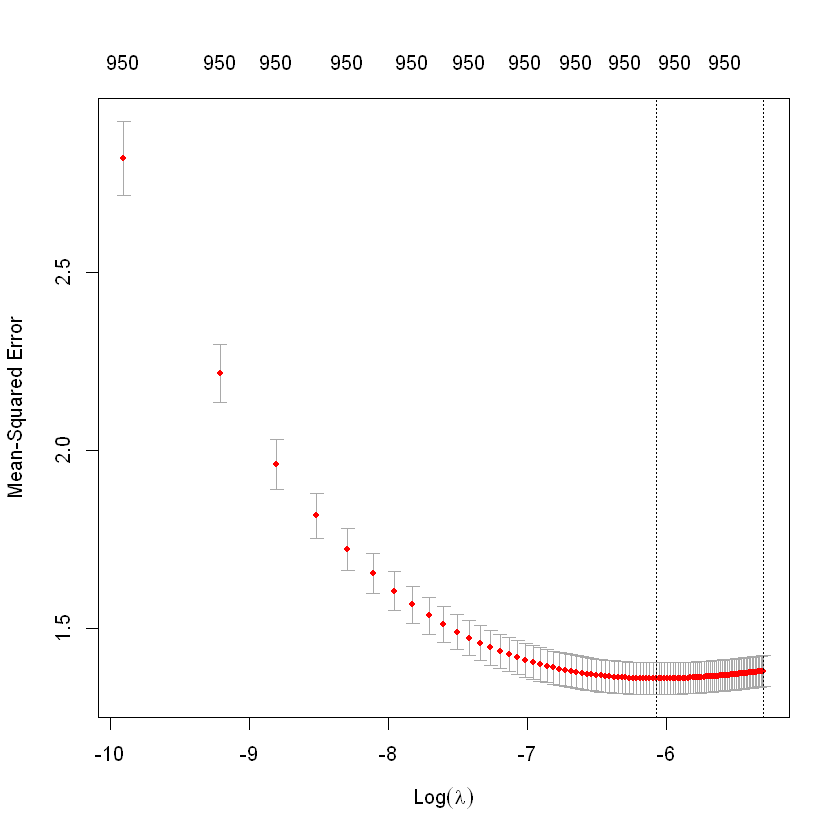

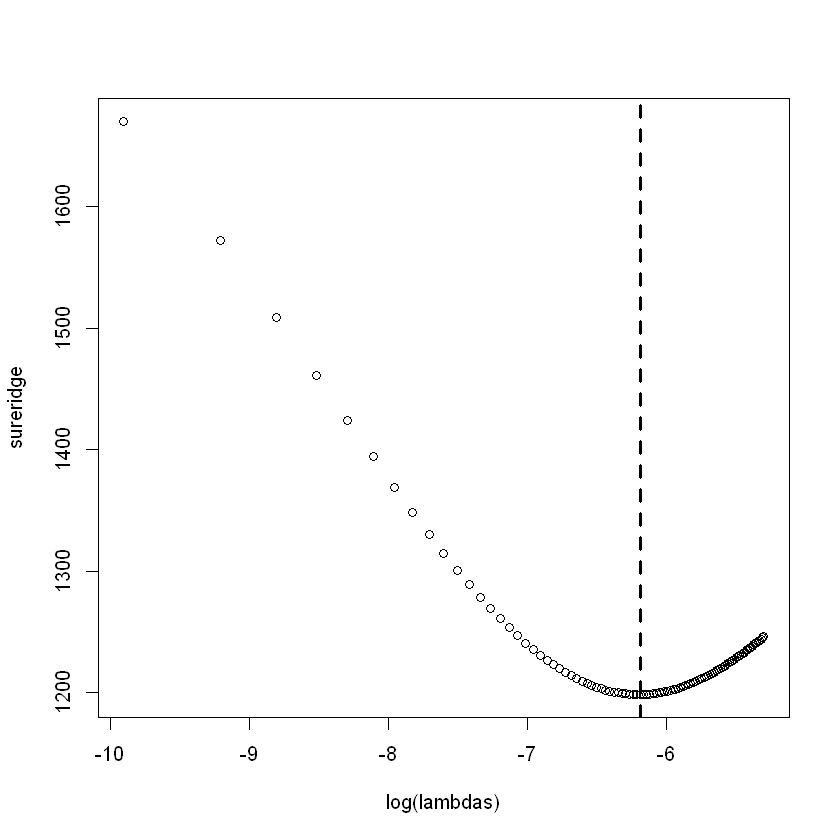

In [20]:
j<-1;
print('K:');
print(k[j]);
regression_comparison(j, lseq1, X, betas, values, n, p, k)

[1] "K:"
[1] 100
           RR_SURE     RR_CV       OLS OLS_mBIC2
Beta MSE 1171.1983 1183.6085 22516.583  2323.642
Mu MSE    537.5082  536.3308  1017.173  1755.039


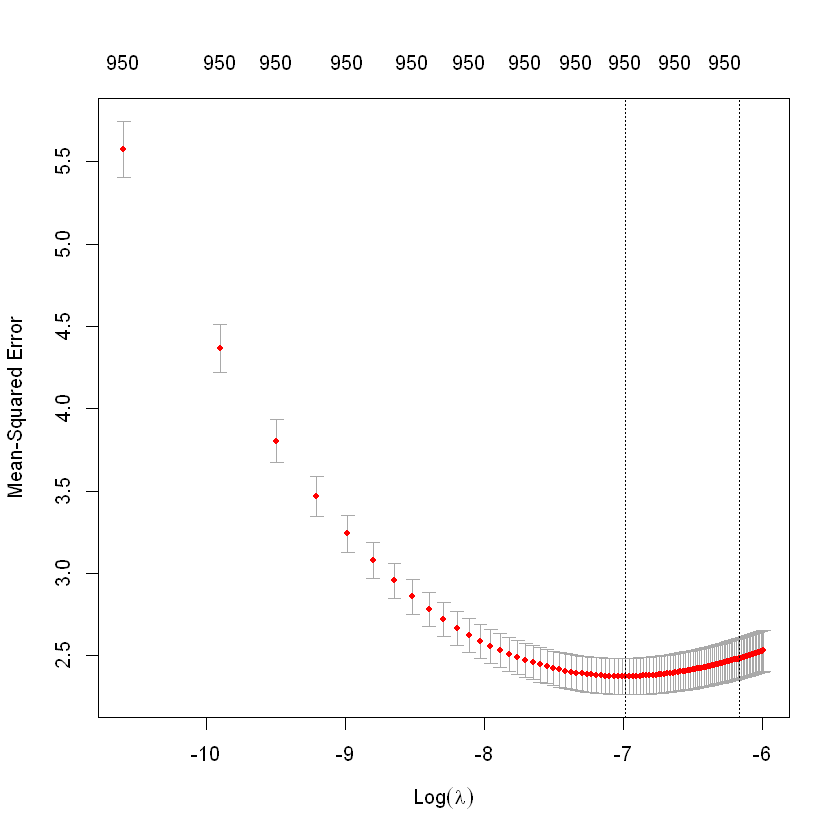

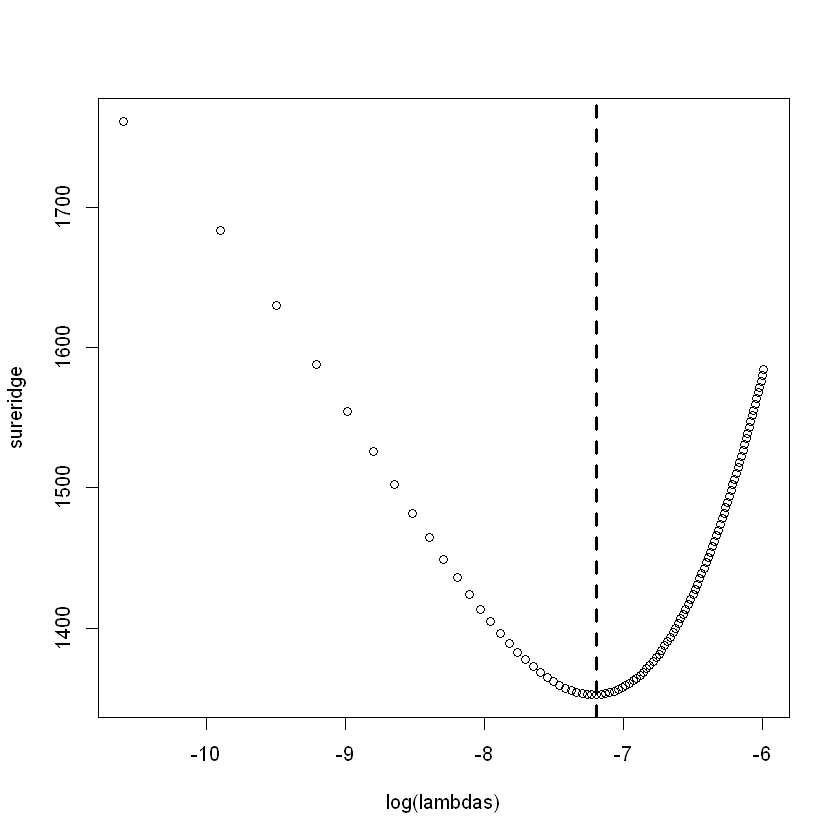

In [21]:
j<-2;
print('K:');
print(k[j]);
regression_comparison(j, lseq2, X, betas, values, n, p, k)

[1] "K:"
[1] 200
           RR_SURE     RR_CV       OLS OLS_mBIC2
Beta MSE 1767.8452 1802.1000 23054.089  4847.461
Mu MSE    654.1077  671.0348  1027.807  3606.203


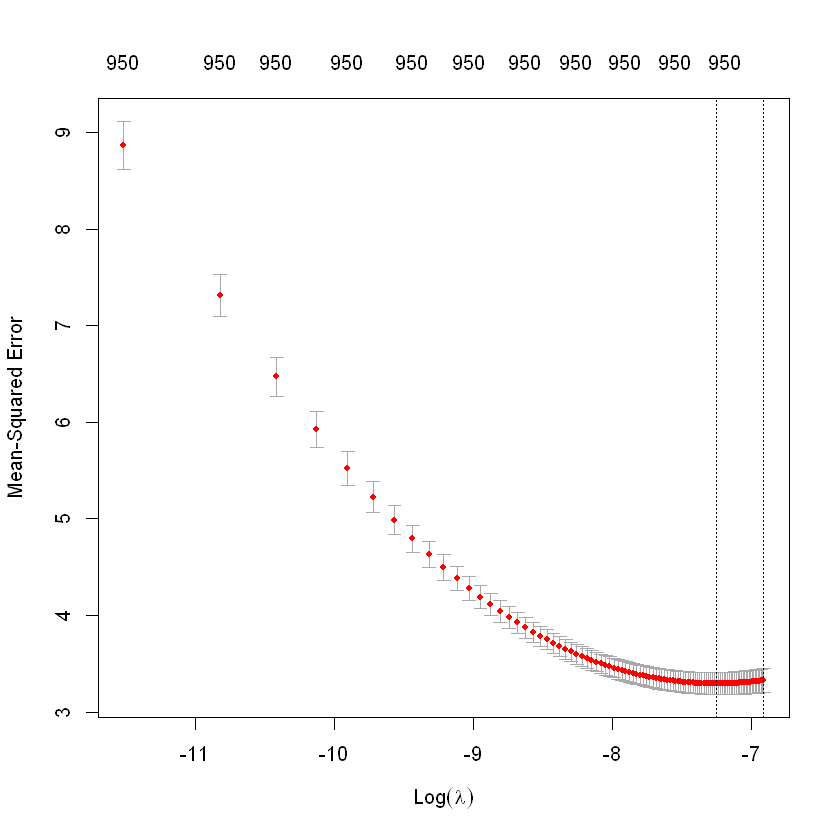

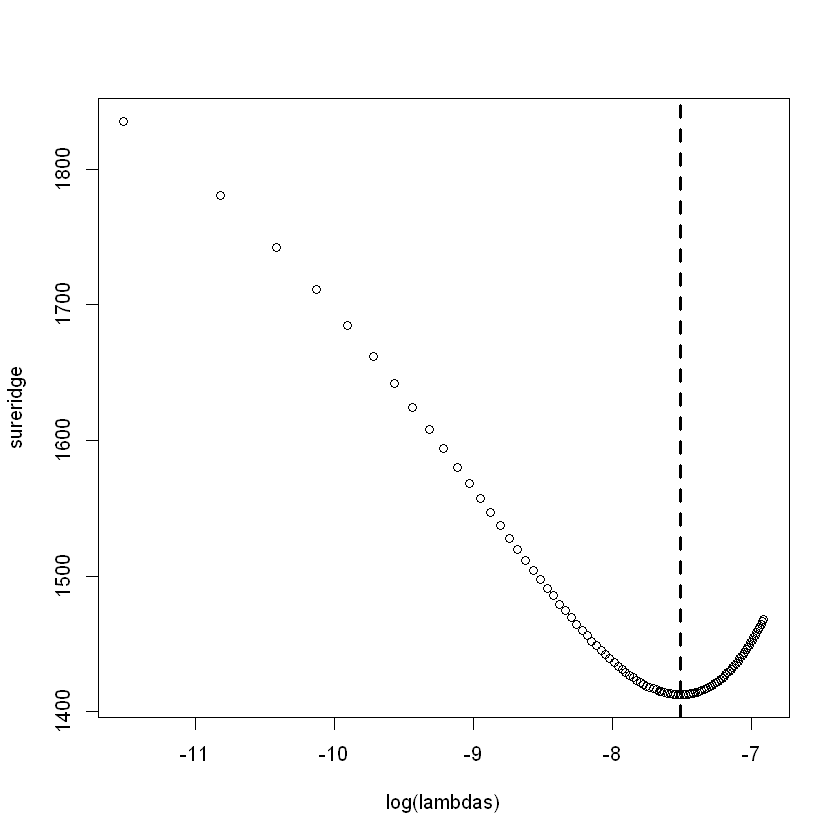

In [22]:
j<-3;
print('K:');
print(k[j]);
regression_comparison(j, lseq3, X, betas, values, n, p, k)

### 50 iterations

In [23]:
Xb1 <- X%*%betas[,1]
Xb2 <- X%*%betas[,2]
Xb3 <- X%*%betas[,3]
Xb <- array(c(Xb1,Xb2,Xb3),dim=c(n,3))

In [24]:
reps <- 50;
mse_ridge_cv <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_cv <- array(rep(0, 3*reps), c(reps, 3));
mse_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3));

In [25]:
for (i in 1:reps){
    epsilon <- rnorm(1000);
    for (j in 1:3){
        Y <- Xb[,j] + epsilon;
        
        if (j==1){
            lambdaseq<-lseq1;
        } else if (j==2){
            lambdaseq<-lseq2;
        } else {
            lambdaseq<-lseq3;
        }

        obj<-glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeSURE<-obj$beta;
        l=ncol(betaRidgeSURE);
        lambdas<-obj$lambda;
        sureridge<-rep(0,l);
        for (u in 1:l){
            trM<-sum(values/(values+lambdas[u]*n));
            sureridge[u]<-sum((X%*%betaRidgeSURE[,u]-Y)^2)+2*trM;
        }
        ind<-which(sureridge==min(sureridge));
        betaRidgeSURE <- betaRidgeSURE[,ind];
        mse_ridge_sure[i,j] <- sum((betaRidgeSURE-betas[,j])^2);
        mse_mu_ridge_sure[i,j] <- sum((X%*%(betaRidgeSURE-betas[,j]))^2);
        
        obj2<-cv.glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeCv<-coefficients(obj2, s='lambda.min');
        betaRidgeCv<-betaRidgeCv[2:(p+1),1];
        mse_ridge_cv[i,j] <- sum((betaRidgeCv-betas[,j])^2);
        mse_mu_ridge_cv[i,j] <- sum((X%*%(betaRidgeCv-betas[,j]))^2);
        
        obj3<-lm(Y~X-1);
        betaols<-obj3$coefficients;
        mse_ols[i,j] <- sum((betaols-betas[,j])^2);
        mse_mu_ols[i,j] <- sum((X%*%(betaols-betas[,j]))^2);
        
        dat<-prepare_data(Y, X, verbose = FALSE);
        obj4<-stepwise(dat, crit='mbic2', maxf=p);
        selected<-as.numeric(obj4$model);
        betaolsmBIC<-rep(0,p);
        if (length(selected)>0){
            X_mBIC<-X[,selected];
            betaolsmBIC[selected] = summary(lm(Y ~ X_mBIC-1))$coef[,1];
        }
        mse_ols_mbic2[i,j] <- sum((betaolsmBIC-betas[,j])^2);
        mse_mu_ols_mbic2[i,j] <- sum((X%*%(betaolsmBIC-betas[,j]))^2);
    }
}

In [26]:
df_beta <- data.frame(
    Beta_MSE_RR_SURE = apply(mse_ridge_sure,2,mean),
    Beta_MSE_RR_CV = apply(mse_ridge_cv,2,mean),
    Beta_MSE_OLS = apply(mse_ols,2,mean),
    Beta_MSE_OLS_mBIC2 = apply(mse_ols_mbic2,2,mean)
);
rownames(df_beta)<-k;
print(df_beta);

    Beta_MSE_RR_SURE Beta_MSE_RR_CV Beta_MSE_OLS Beta_MSE_OLS_mBIC2
20          359.2862       359.4236     19276.92            56.2742
100        1190.8528      1200.8507     19276.92           898.3759
200        1768.6778      1760.9085     19276.92          4756.9657


In [27]:
df_mu <- data.frame(
    Mu_MSE_RR_SURE = apply(mse_mu_ridge_sure,2,mean),
    Mu_MSE_RR_CV = apply(mse_mu_ridge_cv,2,mean),
    Mu_MSE_OLS = apply(mse_mu_ols,2,mean),
    Mu_MSE_OLS_mBIC2 = apply(mse_mu_ols_mbic2,2,mean)
);
rownames(df_mu)<-k;
print(df_mu);

    Mu_MSE_RR_SURE Mu_MSE_RR_CV Mu_MSE_OLS Mu_MSE_OLS_mBIC2
20        265.7922     266.8410   947.3096         53.13656
100       527.1287     531.8946   947.3096        637.49556
200       631.7732     628.9950   947.3096       3335.63083


In this exercise, the signal is stronger than before. Thanks to that mBIC2 is able to detect more important variables and for k=20 it's much better than other methods. For k=100 mBIC2 still gives the smallest $\beta$ MSE, but in terms of $\mu$ MSE RR are better than it. SURE and CV still performs very similarly.

## Ex 4
Repeat Ex 2 and Ex 3 when rows of $X$ are iid random vectors from $\frac{1}{\sqrt{n}}N(0, \Sigma)$, where $\Sigma_{ii} = 1$ and for $i \neq j \quad \Sigma_{i,j} = 0.5$.

### 3.5

In [28]:
n <- 1000;
p <- 950;
k <- c(20,100,200);

sigma = matrix(rep(0.5, p*p), p, p);
diag(sigma) <- 1;

A = chol(sigma);
X = X <- matrix(rnorm(n*p,0,1),p,n);
X <- A %*% X;
X <- t(X/sqrt(n));

signal <- 3.5
betas1 <- rep(0,p)
betas1[1:k[1]] <- signal
betas2 <- rep(0,p)
betas2[1:k[2]] <- signal
betas3 <- rep(0,p)
betas3[1:k[3]] <- signal
betas <- array(c(betas1,betas2,betas3),dim=c(p,3))

Xb1 <- X%*%betas[,1]
Xb2 <- X%*%betas[,2]
Xb3 <- X%*%betas[,3]
Xb <- array(c(Xb1,Xb2,Xb3),dim=c(n,3))

eig<-eigen(t(X)%*%X);
values<-eig$values;

In [29]:
lseq1 <- seq(from=0.0005,by=0.0005, to=0.05);
lseq2<- seq(from=0.00025,by=0.00025, to=0.025);
lseq3<- seq(from=0.0001,by=0.0001, to=0.01);

In exercise 4 I'm using 10 times larger lambdas than in exercises 2 and 3. We can see from the plots that in this exercise SURE and CV select different lambdas.

[1] "K:"
[1] 20
          RR_SURE     RR_CV        OLS OLS_mBIC2
Beta MSE 374.4842 120.83027 38070.3521  222.6374
Mu MSE   204.8230  77.81401   899.7785  117.6033


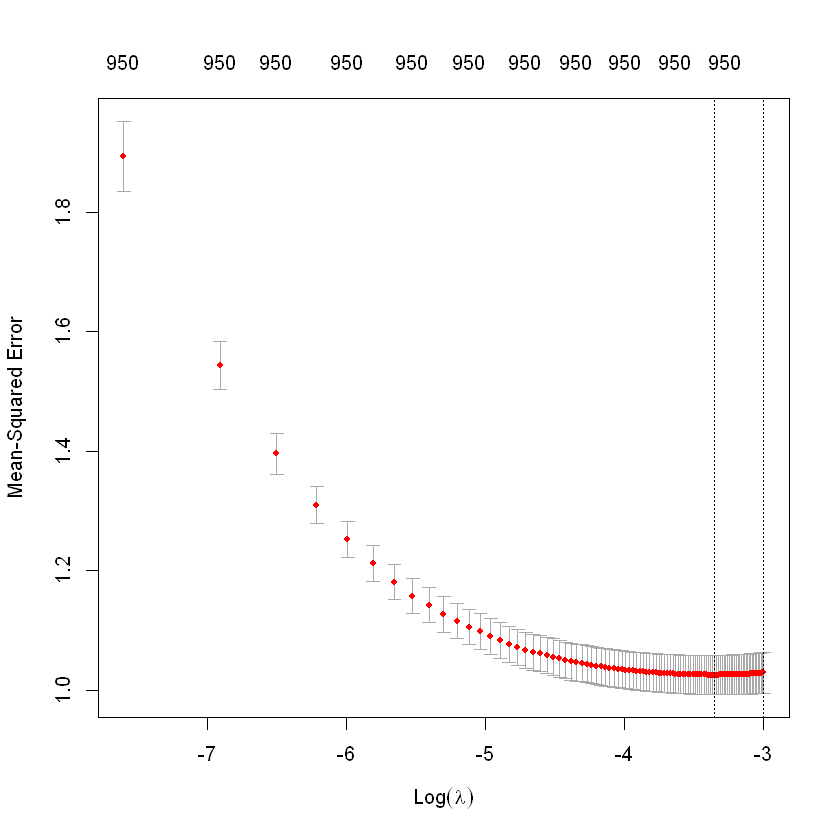

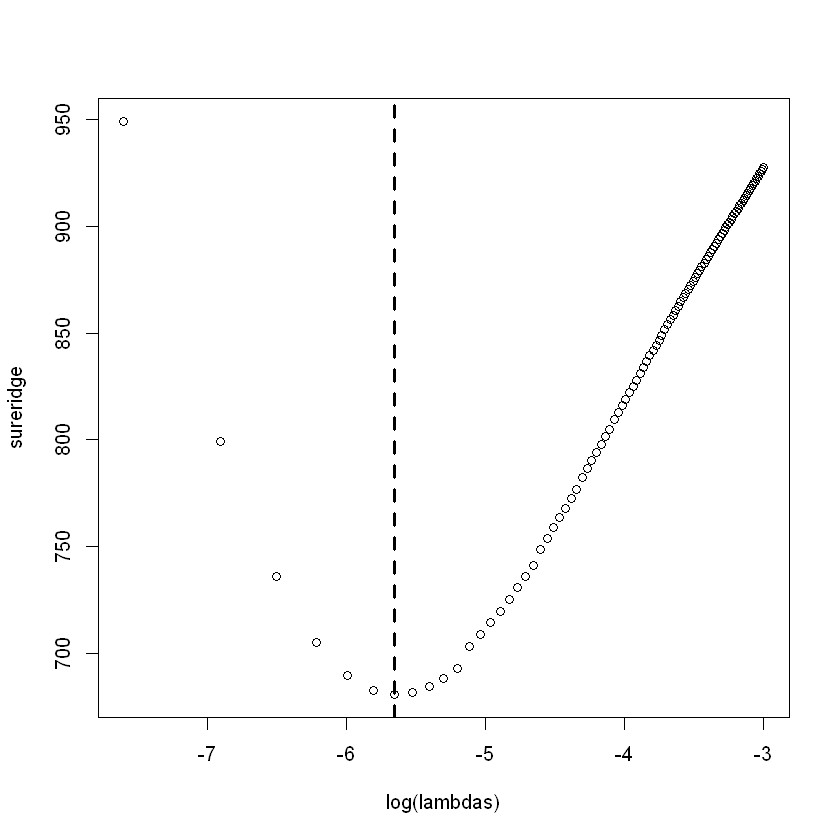

In [30]:
j<-1;
print('K:');
print(k[j]);
regression_comparison(j, lseq1, X, betas, values, n, p, k)

[1] "K:"
[1] 100
          RR_SURE    RR_CV        OLS OLS_mBIC2
Beta MSE 869.5213 692.9681 35428.1521  1281.381
Mu MSE   347.7908 271.2568   968.5327   599.059


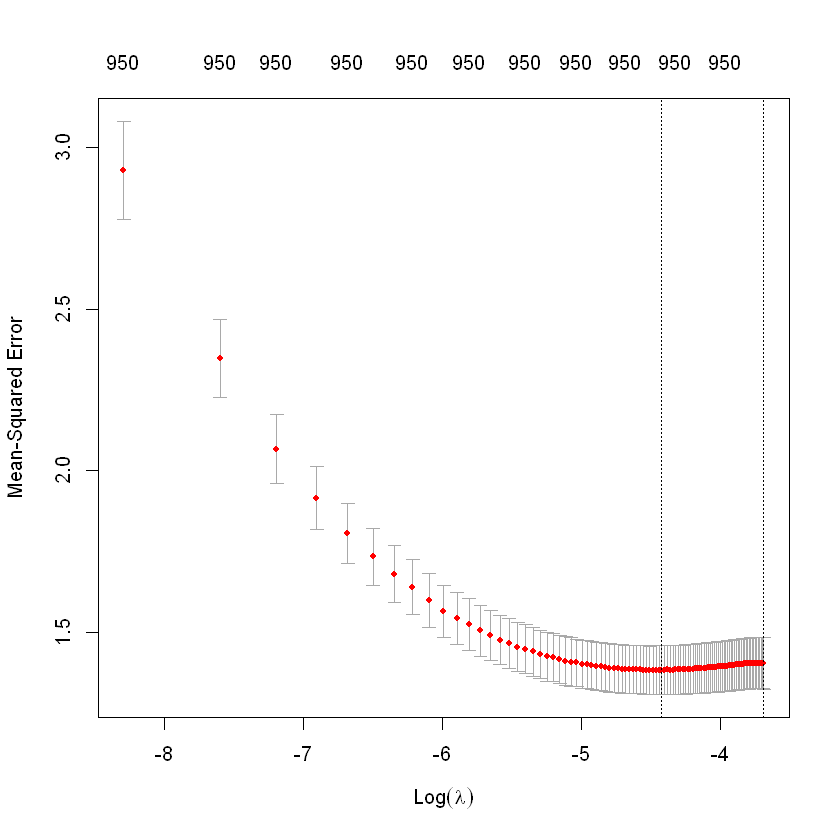

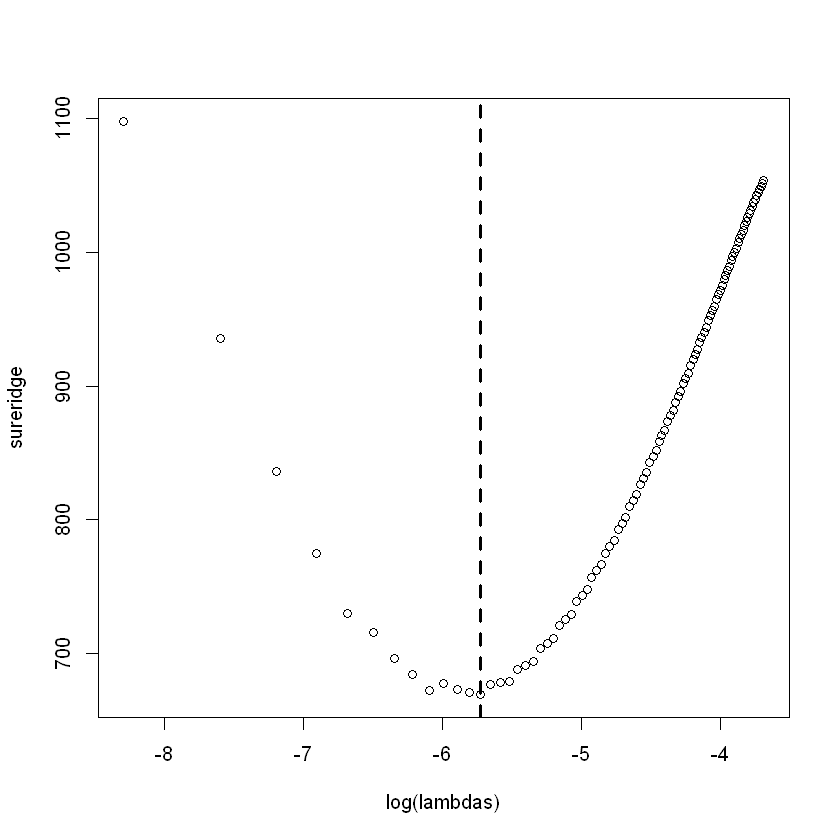

In [31]:
j<-2;
print('K:');
print(k[j]);
regression_comparison(j, lseq2, X, betas, values, n, p, k)

[1] "K:"
[1] 200
           RR_SURE    RR_CV       OLS OLS_mBIC2
Beta MSE 1545.0306 1308.139 40465.866  2784.856
Mu MSE    455.2651  395.645  1016.574  1134.614


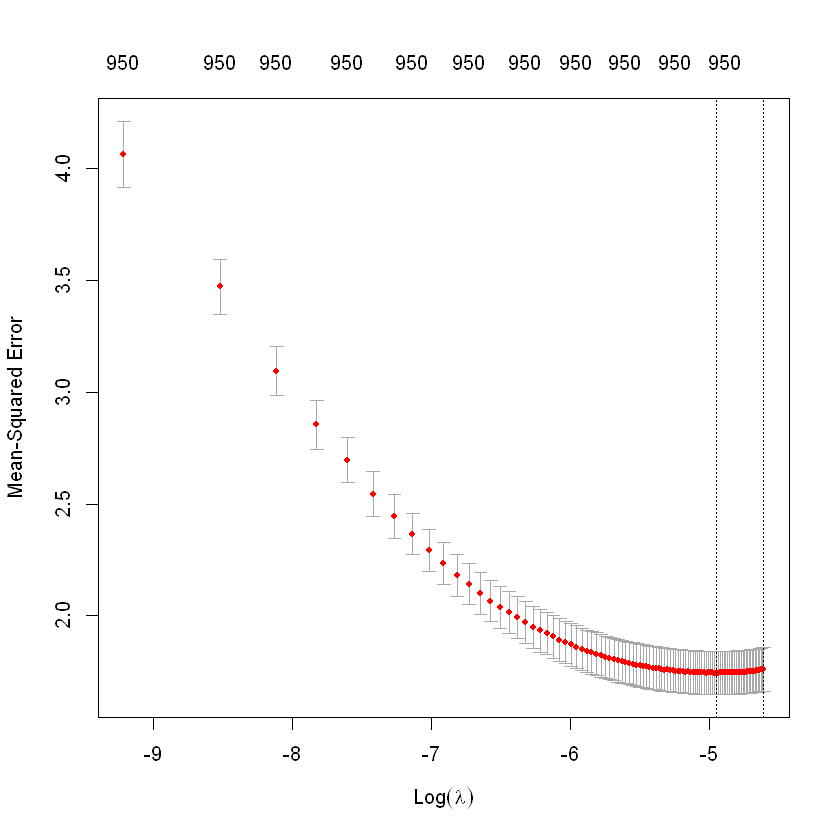

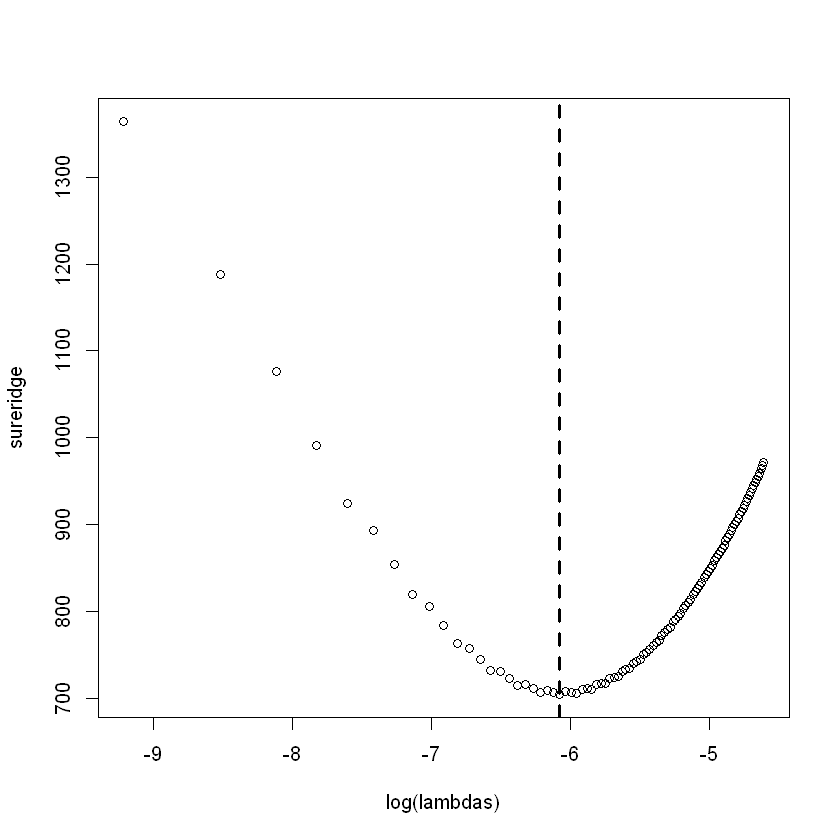

In [32]:
j<-3;
print('K:');
print(k[j]);
regression_comparison(j, lseq3, X, betas, values, n, p, k)

In [33]:
reps <- 50;
mse_ridge_cv <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_cv <- array(rep(0, 3*reps), c(reps, 3));
mse_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3));

In [34]:
for (i in 1:reps){
    epsilon <- rnorm(1000);
    for (j in 1:3){
        Y <- Xb[,j] + epsilon;
        
        if (j==1){
            lambdaseq<-lseq1;
        } else if (j==2){
            lambdaseq<-lseq2;
        } else {
            lambdaseq<-lseq3;
        }

        obj<-glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeSURE<-obj$beta;
        l=ncol(betaRidgeSURE);
        lambdas<-obj$lambda;
        sureridge<-rep(0,l);
        for (u in 1:l){
            trM<-sum(values/(values+lambdas[u]*n));
            sureridge[u]<-sum((X%*%betaRidgeSURE[,u]-Y)^2)+2*trM;
        }
        ind<-which(sureridge==min(sureridge));
        betaRidgeSURE <- betaRidgeSURE[,ind];
        mse_ridge_sure[i,j] <- sum((betaRidgeSURE-betas[,j])^2);
        mse_mu_ridge_sure[i,j] <- sum((X%*%(betaRidgeSURE-betas[,j]))^2);
        
        obj2<-cv.glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeCv<-coefficients(obj2, s='lambda.min');
        betaRidgeCv<-betaRidgeCv[2:(p+1),1];
        mse_ridge_cv[i,j] <- sum((betaRidgeCv-betas[,j])^2);
        mse_mu_ridge_cv[i,j] <- sum((X%*%(betaRidgeCv-betas[,j]))^2);
        
        obj3<-lm(Y~X-1);
        betaols<-obj3$coefficients;
        mse_ols[i,j] <- sum((betaols-betas[,j])^2);
        mse_mu_ols[i,j] <- sum((X%*%(betaols-betas[,j]))^2);
        
        dat<-prepare_data(Y, X, verbose = FALSE);
        obj4<-stepwise(dat, crit='mbic2', maxf=p);
        selected<-as.numeric(obj4$model);
        betaolsmBIC<-rep(0,p);
        if (length(selected)>0){
            X_mBIC<-X[,selected];
            betaolsmBIC[selected] = summary(lm(Y ~ X_mBIC-1))$coef[,1];
        }
        mse_ols_mbic2[i,j] <- sum((betaolsmBIC-betas[,j])^2);
        mse_mu_ols_mbic2[i,j] <- sum((X%*%(betaolsmBIC-betas[,j]))^2);
    }
}

In [35]:
df_beta <- data.frame(
    Beta_MSE_RR_SURE = apply(mse_ridge_sure,2,mean),
    Beta_MSE_RR_CV = apply(mse_ridge_cv,2,mean),
    Beta_MSE_OLS = apply(mse_ols,2,mean),
    Beta_MSE_OLS_mBIC2 = apply(mse_ols_mbic2,2,mean)
);
rownames(df_beta)<-k;
print(df_beta);

    Beta_MSE_RR_SURE Beta_MSE_RR_CV Beta_MSE_OLS Beta_MSE_OLS_mBIC2
20          442.8690       125.4276     40587.62           243.9084
100         952.1347       701.7578     40587.62          1322.6743
200        1437.0725      1287.2384     40587.62          2700.1593


In [36]:
df_mu <- data.frame(
    Mu_MSE_RR_SURE = apply(mse_mu_ridge_sure,2,mean),
    Mu_MSE_RR_CV = apply(mse_mu_ridge_cv,2,mean),
    Mu_MSE_OLS = apply(mse_mu_ols,2,mean),
    Mu_MSE_OLS_mBIC2 = apply(mse_mu_ols_mbic2,2,mean)
);
rownames(df_mu)<-k;
print(df_mu);

    Mu_MSE_RR_SURE Mu_MSE_RR_CV Mu_MSE_OLS Mu_MSE_OLS_mBIC2
20        236.2973     70.92404   949.3217         122.0309
100       356.0700    267.19114   949.3217         620.2697
200       438.5734    396.32787   949.3217        1188.4057


When X comes from a multivariate normal distribution with the correlation between variables, CV gives much better results than SURE. For k=20 mBIC2 ranks between those 2, but for larger k mBIC2 is worse than both of them.

### 5

In [37]:
n <- 1000;
p <- 950;
k <- c(20,100,200);

sigma = matrix(rep(0.5, p*p), p, p);
diag(sigma) <- 1;

A = chol(sigma);
X = X <- matrix(rnorm(n*p,0,1),p,n);
X <- A %*% X;
X <- t(X/sqrt(n));

signal <- 5
betas1 <- rep(0,p)
betas1[1:k[1]] <- signal
betas2 <- rep(0,p)
betas2[1:k[2]] <- signal
betas3 <- rep(0,p)
betas3[1:k[3]] <- signal
betas <- array(c(betas1,betas2,betas3),dim=c(p,3))

Xb1 <- X%*%betas[,1]
Xb2 <- X%*%betas[,2]
Xb3 <- X%*%betas[,3]
Xb <- array(c(Xb1,Xb2,Xb3),dim=c(n,3))

eig<-eigen(t(X)%*%X);
values<-eig$values;

In [38]:
lseq1 <- seq(from=0.0005,by=0.0005, to=0.05);
lseq2<- seq(from=0.00025,by=0.00025, to=0.025);
lseq3<- seq(from=0.0001,by=0.0001, to=0.01);

[1] "K:"
[1] 20
          RR_SURE     RR_CV        OLS OLS_mBIC2
Beta MSE 659.1777 243.35819 31762.0211  349.9113
Mu MSE   291.0347  98.83523   955.6172  153.7594


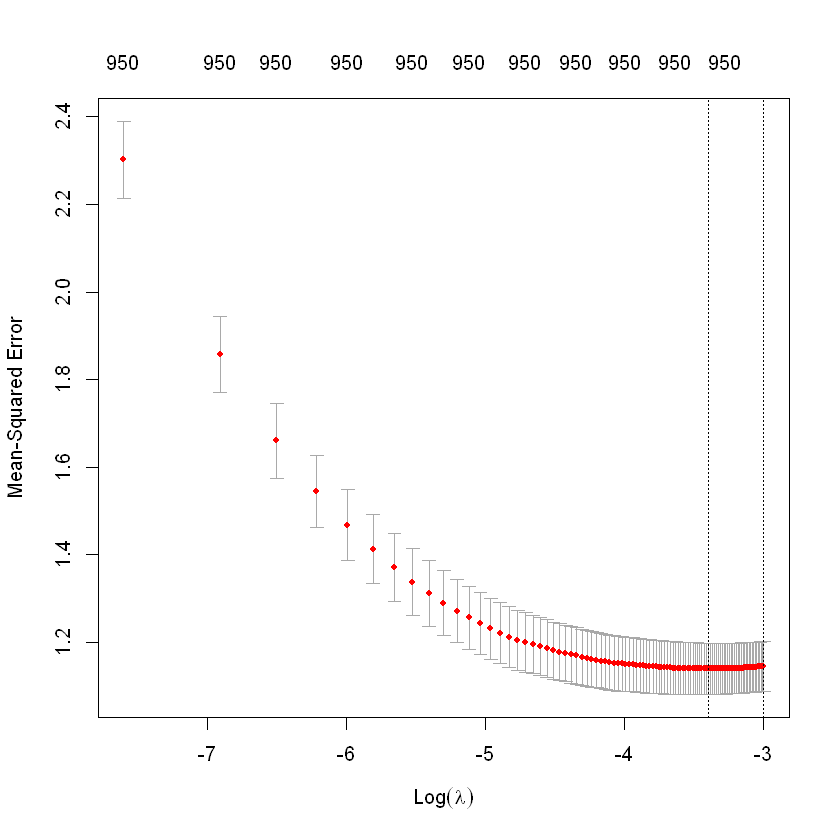

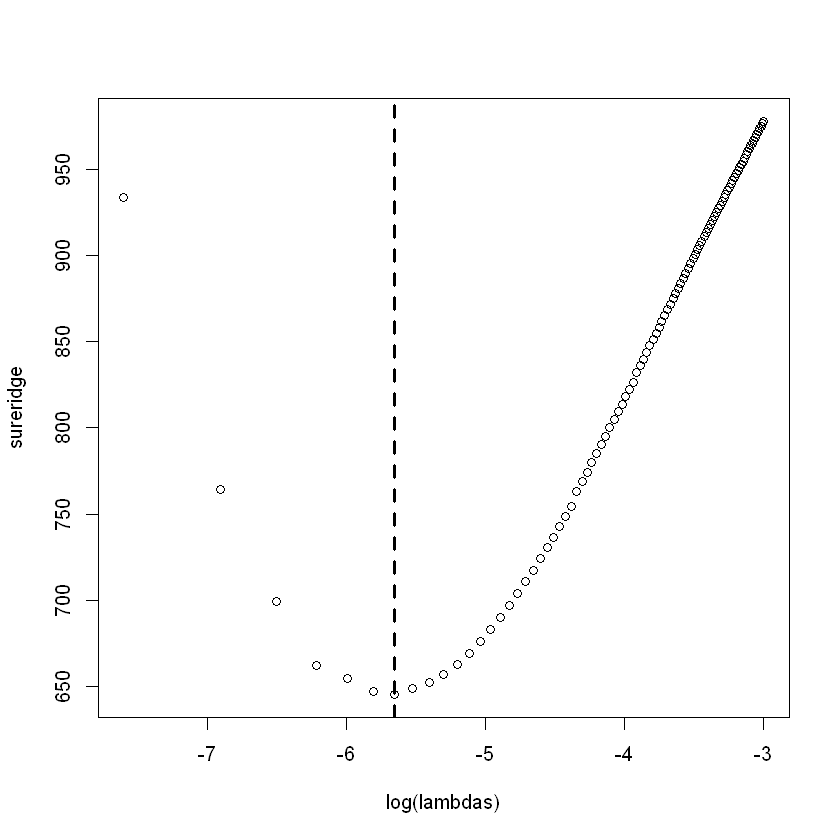

In [39]:
j<-1;
print('K:');
print(k[j]);
regression_comparison(j, lseq1, X, betas, values, n, p, k)

[1] "K:"
[1] 100
           RR_SURE     RR_CV        OLS OLS_mBIC2
Beta MSE 1546.2484 1239.1434 29215.4496 2366.7038
Mu MSE    426.1399  370.1887   909.8223  872.9113


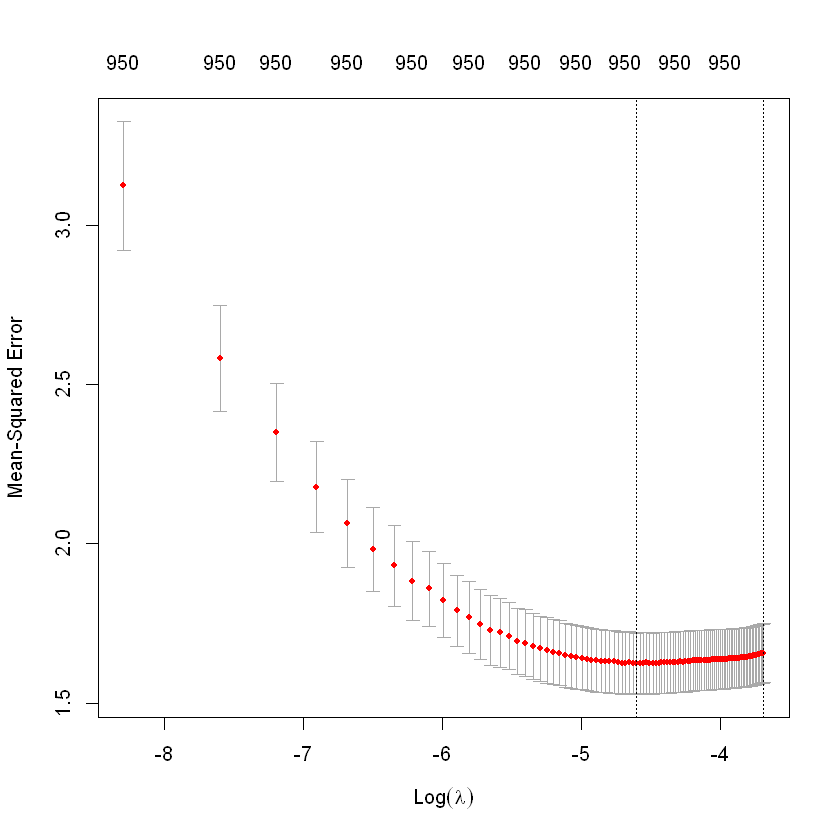

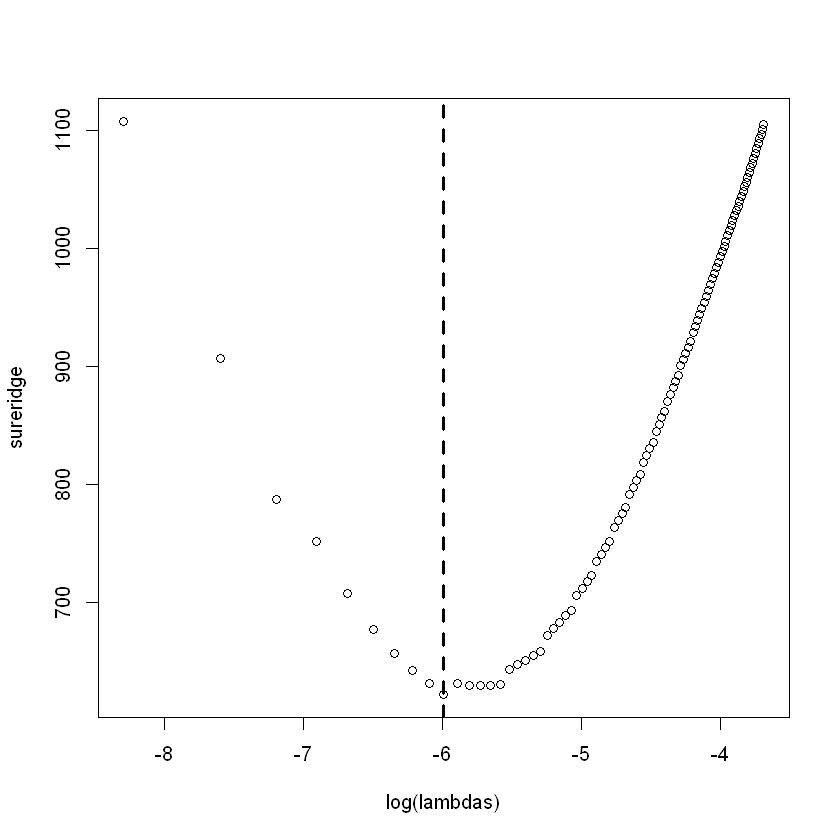

In [40]:
j<-2;
print('K:');
print(k[j]);
regression_comparison(j, lseq2, X, betas, values, n, p, k)

[1] "K:"
[1] 200
           RR_SURE     RR_CV        OLS OLS_mBIC2
Beta MSE 1876.8311 1820.0892 32100.7267  5419.603
Mu MSE    495.1902  486.9997   901.3837  2107.733


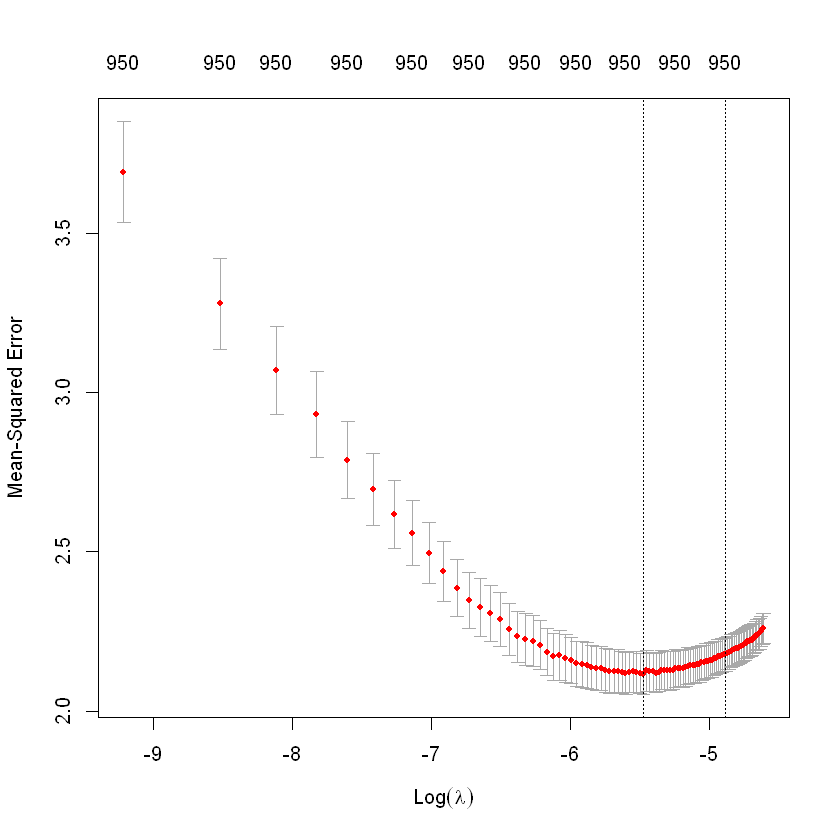

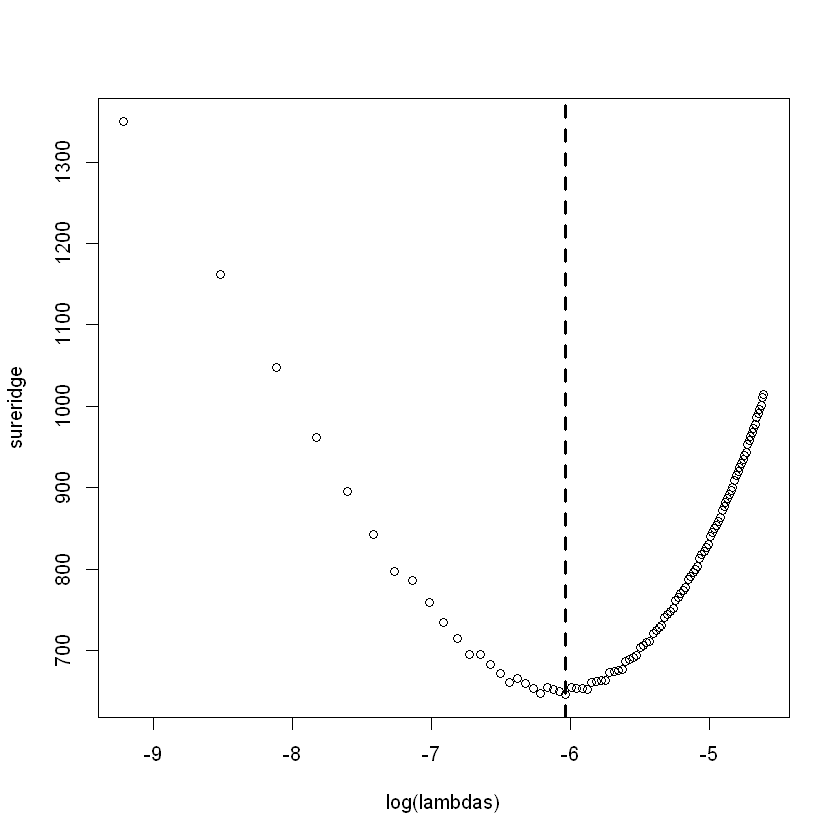

In [41]:
j<-3;
print('K:');
print(k[j]);
regression_comparison(j, lseq3, X, betas, values, n, p, k)

In [42]:
reps <- 50;
mse_ridge_cv <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_cv <- array(rep(0, 3*reps), c(reps, 3));
mse_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ridge_sure <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols <- array(rep(0, 3*reps), c(reps, 3)); 
mse_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3)); 
mse_mu_ols_mbic2 <- array(rep(0, 3*reps), c(reps, 3));

In [43]:
for (i in 1:reps){
    epsilon <- rnorm(1000);
    for (j in 1:3){
        Y <- Xb[,j] + epsilon;
        
        if (j==1){
            lambdaseq<-lseq1;
        } else if (j==2){
            lambdaseq<-lseq2;
        } else {
            lambdaseq<-lseq3;
        }

        obj<-glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeSURE<-obj$beta;
        l=ncol(betaRidgeSURE);
        lambdas<-obj$lambda;
        sureridge<-rep(0,l);
        for (u in 1:l){
            trM<-sum(values/(values+lambdas[u]*n));
            sureridge[u]<-sum((X%*%betaRidgeSURE[,u]-Y)^2)+2*trM;
        }
        ind<-which(sureridge==min(sureridge));
        betaRidgeSURE <- betaRidgeSURE[,ind];
        mse_ridge_sure[i,j] <- sum((betaRidgeSURE-betas[,j])^2);
        mse_mu_ridge_sure[i,j] <- sum((X%*%(betaRidgeSURE-betas[,j]))^2);
        
        obj2<-cv.glmnet(X,Y,alpha=0,intercept=FALSE, standardize=FALSE, lambda=lambdaseq);
        betaRidgeCv<-coefficients(obj2, s='lambda.min');
        betaRidgeCv<-betaRidgeCv[2:(p+1),1];
        mse_ridge_cv[i,j] <- sum((betaRidgeCv-betas[,j])^2);
        mse_mu_ridge_cv[i,j] <- sum((X%*%(betaRidgeCv-betas[,j]))^2);
        
        obj3<-lm(Y~X-1);
        betaols<-obj3$coefficients;
        mse_ols[i,j] <- sum((betaols-betas[,j])^2);
        mse_mu_ols[i,j] <- sum((X%*%(betaols-betas[,j]))^2);
        
        dat<-prepare_data(Y, X, verbose = FALSE);
        obj4<-stepwise(dat, crit='mbic2', maxf=p);
        selected<-as.numeric(obj4$model);
        betaolsmBIC<-rep(0,p);
        if (length(selected)>0){
            X_mBIC<-X[,selected];
            betaolsmBIC[selected] = summary(lm(Y ~ X_mBIC-1))$coef[,1];
        }
        mse_ols_mbic2[i,j] <- sum((betaolsmBIC-betas[,j])^2);
        mse_mu_ols_mbic2[i,j] <- sum((X%*%(betaolsmBIC-betas[,j]))^2);
    }
}

In [44]:
df_beta <- data.frame(
    Beta_MSE_RR_SURE = apply(mse_ridge_sure,2,mean),
    Beta_MSE_RR_CV = apply(mse_ridge_cv,2,mean),
    Beta_MSE_OLS = apply(mse_ols,2,mean),
    Beta_MSE_OLS_mBIC2 = apply(mse_ols_mbic2,2,mean)
);
rownames(df_beta)<-k;
print(df_beta);

    Beta_MSE_RR_SURE Beta_MSE_RR_CV Beta_MSE_OLS Beta_MSE_OLS_mBIC2
20          647.0918       245.8705     38508.24           293.7398
100        1460.3659      1243.2591     38508.24          2068.9749
200        2120.2801      1990.7808     38508.24          5183.6649


In [45]:
df_mu <- data.frame(
    Mu_MSE_RR_SURE = apply(mse_mu_ridge_sure,2,mean),
    Mu_MSE_RR_CV = apply(mse_mu_ridge_cv,2,mean),
    Mu_MSE_OLS = apply(mse_mu_ols,2,mean),
    Mu_MSE_OLS_mBIC2 = apply(mse_mu_ols_mbic2,2,mean)
);
rownames(df_mu)<-k;
print(df_mu);

    Mu_MSE_RR_SURE Mu_MSE_RR_CV Mu_MSE_OLS Mu_MSE_OLS_mBIC2
20        290.3551     105.8257   953.6382         135.7653
100       443.3590     384.3877   953.6382         771.0648
200       533.8279     518.4833   953.6382        1986.5880


When the signal is equal to 5 the ranking is the same as before. The signal is a bit stronger and thanks to that when k=20 mBIC2 it's a bit closer to RR with CV, but it still can't select all important variables. For k>20 it's worse than both CV and SURE. CV still performs better than SURE for every k.